In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [30]:
base_dirpath = '../checkpoints/predictions'

TARGET_LENGTH = 168

In [31]:
csv_paths = [os.path.join(base_dirpath, path) for path in os.listdir(base_dirpath) if path.endswith('.csv')]
model_names = [path.split('/')[-1].split('.')[0].upper() for path in csv_paths]

y_true = None
y_preds = []

for csv_path in csv_paths:
    df = pd.read_csv(csv_path)
    print(csv_path)
    if y_true is None:
        y_true = list(df.y_true.values)
    y_preds.append(list(df.y_pred.values))
print(model_names)

../checkpoints/predictions/vanilla_transformer.csv
../checkpoints/predictions/gru.csv
../checkpoints/predictions/random_forest.csv
../checkpoints/predictions/ft_transformer.csv
../checkpoints/predictions/tab_transformer.csv
../checkpoints/predictions/cnn.csv
../checkpoints/predictions/stab_transformer.csv
../checkpoints/predictions/lstm.csv
../checkpoints/predictions/rnn_cnn.csv
../checkpoints/predictions/rnn.csv
../checkpoints/predictions/informer.csv
['VANILLA_TRANSFORMER', 'GRU', 'RANDOM_FOREST', 'FT_TRANSFORMER', 'TAB_TRANSFORMER', 'CNN', 'STAB_TRANSFORMER', 'LSTM', 'RNN_CNN', 'RNN', 'INFORMER']


In [32]:
def plot_predictions(y_true, predictions, model_names=None):
    plt.figure(figsize=(20, 12))
    y_true = y_true[:TARGET_LENGTH]
    x = np.arange(len(y_true))
    
    # Plot the true values
    #plt.plot(x, y_true, label='True Values', linewidth=2, color='black', linestyle='--')
    sns.lineplot(x=x, y=y_true, label='Actual', linewidth=2, color='black', marker='o')

    # Plot predictions for each model
    for i, y_pred in enumerate(predictions):
        label = model_names[i] if model_names else f'Model {i+1}'
        #plt.plot(x, y_pred, label=label, linewidth=2)
        y_pred = y_pred[:TARGET_LENGTH]
        sns.lineplot(x=x, y=y_pred, label=label, linewidth=2)
    
    # Adding title and labels
    plt.title('Model Predictions vs. Actual temperature')
    plt.xlabel('Week / Hour')
    plt.ylabel('Temperature')
    
    # Adding a legend
    plt.legend()
    
    # Adding grid for better readability
    plt.grid(True)
    
    # Show plot
    plt.show()

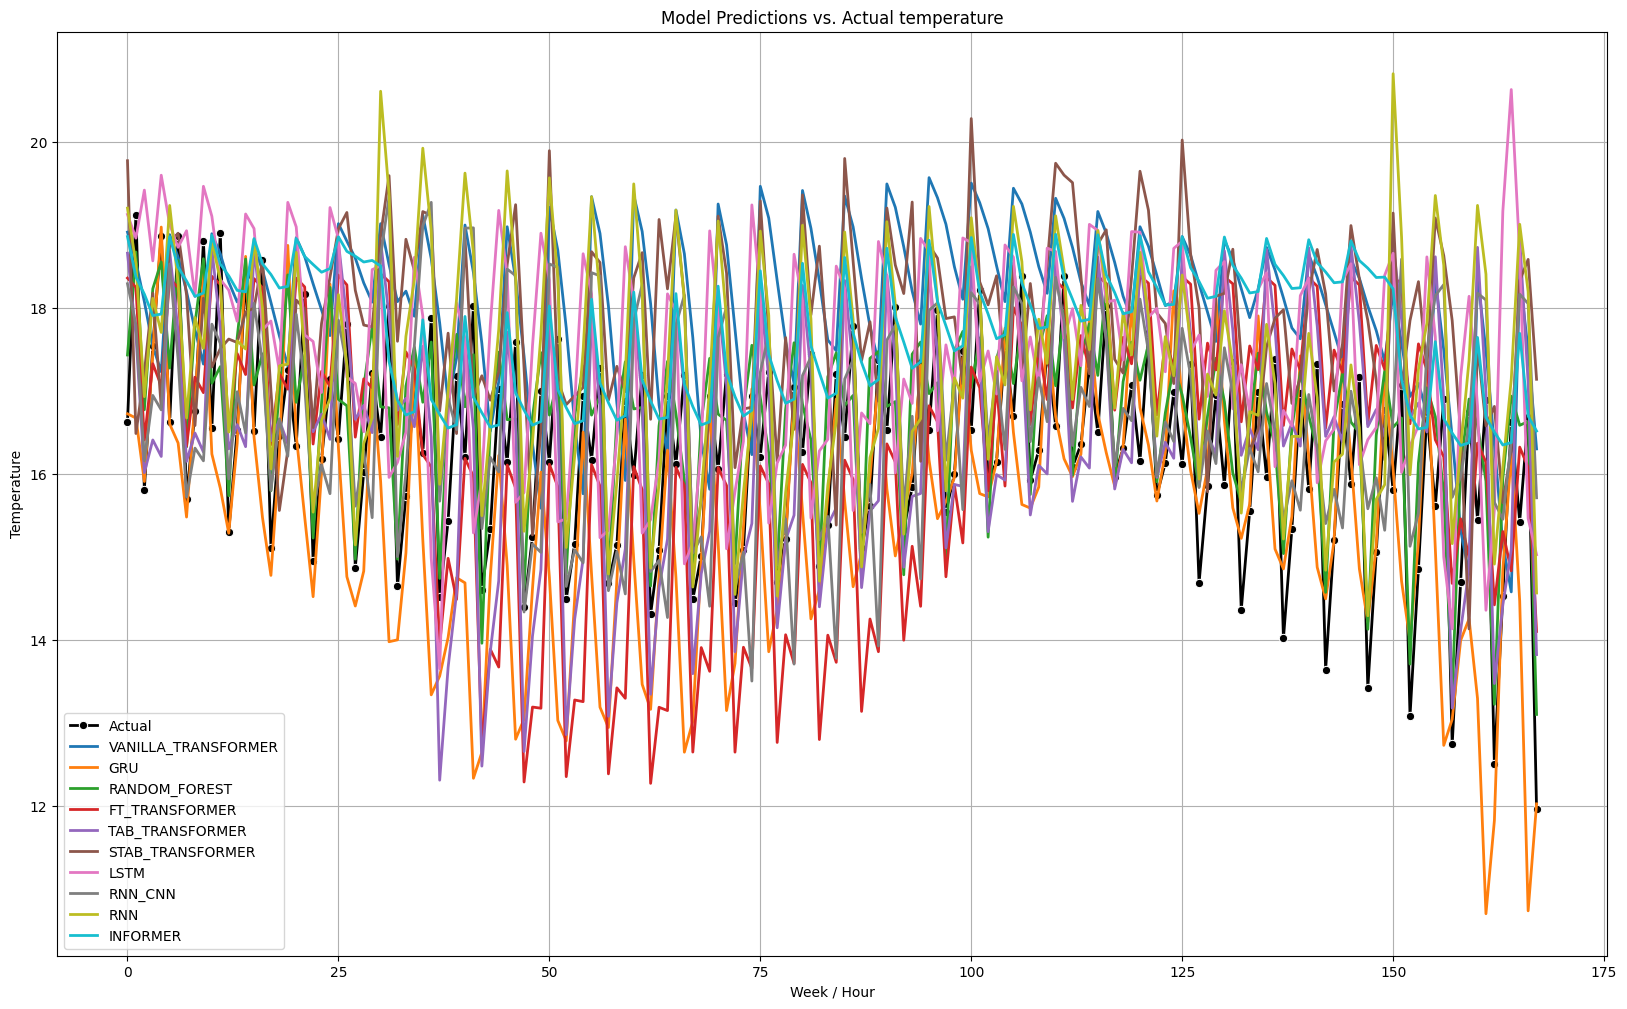

In [33]:
plot_predictions(y_true, y_preds, model_names)